<a href="https://colab.research.google.com/github/AnyaAP/ComputerGraphics/blob/main/CohenSutherlandClip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x1: 5
y1: 5
x2: 65
y2: 90
x_min: 10
y_min: 10
x_max: 60
y_max: 70


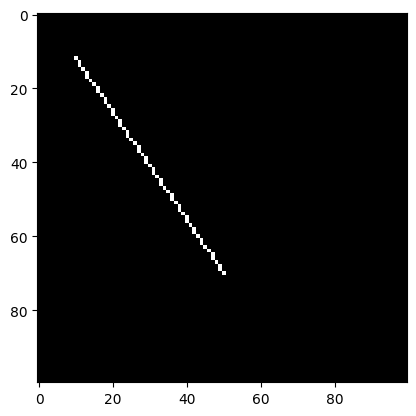

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.new('RGB',(100, 100))

def Bresenham(x0,y0,x1,y1):
  e=0
  is_steep = abs(y1-y0) > abs(x1-x0)
  if is_steep:
    temp = x0
    x0 = y0
    y0 = temp
    temp1 = x1
    x1 = y1
    y1 = temp1
  if x0 > x1:
   temp2 = x0
   x0 = x1
   x1 = temp2
   temp3 = y0
   y0 = y1
   y1 = temp3
  cur_y=y0
  for i in range(x0,x1+1):
    if is_steep:
      image.putpixel((cur_y,i),(255,255,255))
    else:
     image.putpixel((i,cur_y),(255,255,255))
    e=e+2*abs(y1-y0)
    if e > abs(x1-x0):
     e=e-2*abs(x1-x0)
     if y1>y0:
        cur_y+=1
     elif y1<y0:
       cur_y-=1
     else:
       cur_y = y0

INSIDE = 0
LEFT = 1
RIGHT = 2
BOTTOM = 4
TOP = 8

def computeCode(x, y, x_min, y_min, x_max, y_max):
    code = INSIDE
    if x < x_min:
        code |= LEFT
    elif x > x_max:
        code |= RIGHT
    if y < y_min:
        code |= BOTTOM
    elif y > y_max:
        code |= TOP
    return code

def cohenSutherlandClip(x1, y1, x2, y2, x_min, y_min, x_max, y_max):

    code1 = computeCode(x1, y1, x_min, y_min, x_max, y_max)
    code2 = computeCode(x2, y2, x_min, y_min, x_max, y_max)
    accept = False

    while True:

        if code1 == 0 and code2 == 0:
            accept = True
            break

        elif (code1 & code2) != 0:
            break

        else:

            x = 1.0
            y = 1.0
            if code1 != 0:
                code_out = code1
            else:
                code_out = code2

            if code_out & TOP:
                x = x1 + (x2 - x1) * (y_max - y1) / (y2 - y1)
                y = y_max
            elif code_out & BOTTOM:
                x = x1 + (x2 - x1) * (y_min - y1) / (y2 - y1)
                y = y_min
            elif code_out & RIGHT:
                y = y1 + (y2 - y1) * (x_max - x1) / (x2 - x1)
                x = x_max
            elif code_out & LEFT:
                y = y1 + (y2 - y1) * (x_min - x1) / (x2 - x1)
                x = x_min

            if code_out == code1:
                x1 = x
                y1 = y
                code1 = computeCode(x1, y1, x_min, y_min, x_max, y_max)
            else:
                x2 = x
                y2 = y
                code2 = computeCode(x2, y2, x_min, y_min, x_max, y_max)

    if accept:
      Bresenham(int(x1), int(y1), int(x2), int(y2))
if __name__ == '__main__':
    x1 = int(input("x1: "))
    y1 = int(input("y1: "))
    x2 = int(input("x2: "))
    y2 = int(input("y2: "))
    x_min = int(input("x_min: "))
    y_min = int(input("y_min: "))
    x_max = int(input("x_max: "))
    y_max = int(input("y_max: "))
    cohenSutherlandClip(x1, y1, x2, y2, x_min, y_min, x_max, y_max)
    plt.imshow(image)